<a href="https://colab.research.google.com/github/srikanth2102/IPL_SCORE_PREDICTION/blob/main/IPL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL SCORE PREDICTION**

In [ ]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
#uploading the file in the device to google colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#reading the file using pandas
import pandas as pd
ipl=pd.read_csv("data.csv")
ipl.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
#removing unnecesary features
ipl.drop(['mid','batsman','bowler','striker','non-striker','date'],axis=1)
ipl.shape

(76014, 15)

In [ ]:
#veiwing unique values in venue and battting_team
print(ipl['venue'].unique())
ipl['batting_team'].unique()
ipl['count'] = 1
ipl.groupby(['venue']).count()['count']

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurashtra Cricket Associa

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [ ]:
#retainig the current teams alone(2021)
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']
current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']
ipl = ipl[(ipl['batting_team'].isin(current_teams)) &(ipl['bowling_team'].isin(current_teams))]
ipl = ipl[(ipl['venue'].isin(current_venues))]
ipl = ipl[ipl['overs']>=5.0]
ipl.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,count
32,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222,1
33,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222,1
34,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222,1
35,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,222,1
36,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,222,1


In [ ]:
#creating dummies for categorical data
final_ipl = pd.get_dummies(data=ipl, columns=['batting_team', 'bowling_team', 'venue'])
final_ipl.head()

,mid,date,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,count,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,1,18-04-2008,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
33,1,18-04-2008,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
34,1,18-04-2008,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
35,1,18-04-2008,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
36,1,18-04-2008,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
#rearranging the feature columns 
final_ipl = final_ipl[['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
       'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       ]]
target=ipl['total']
final_ipl.head()


,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.5,61,1,58,1


In [ ]:
#spliting the data into training and testind(75%,25%)
X_train, X_test, Y_train, Y_test = train_test_split(final_ipl, target, test_size=0.25)

**LINEAR** **REGRESSION**

In [ ]:
#creating a dictionary to store all the models
models=dict()

In [ ]:
#implementing LinearRegression
#importing the LinearRegression model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

#fitting LinearRegression to the training data
lin_reg.fit(X_train, Y_train)

#predicting the test data
Y_pred_lin_reg=lin_reg.predict(X_test)

#measuring the error
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_lin_reg))
print(Y_pred_lin_reg)
print(Y_test)

#model score
test_score_lin_reg = str(lin_reg.score(X_test,Y_test) * 100)
print("score on test data :",test_score_lin_reg)
models['lin_reg']=test_score_lin_reg

Mean absolute error: 12.985493568232663
[217.96875 159.28125 175.6875  ... 142.15625 190.40625 223.96875]
59845    226
69402    157
22749    183
62759    111
61144    130
        ... 
55669    209
47706    132
1696     158
63220    191
26579    205
Name: total, Length: 7152, dtype: int64
score on test data : 67.11837553332124


In [ ]:
#implemnting LassoRegression
from sklearn.linear_model import Lasso
print(Lasso())
lasso_reg = Lasso(alpha=0.001)

#fitting Lasso for training data 
lasso_reg.fit(X_train, Y_train) 

#predicting the test_data
Y_pred_lasso= lasso_reg.predict(X_test)

#measuring error
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_lasso))
print(Y_pred_lasso)
print(Y_test)

#model score
test_score_lasso_reg = str(lasso_reg.score(X_test,Y_test) * 100)
print("score on test data :",test_score_lasso_reg)
models['lasso_reg']=test_score_lasso_reg

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean absolute error: 12.989660685012213
[218.14597037 159.05754966 176.04583946 ... 142.09631485 190.33871282
 224.17101782]
59845    226
69402    157
22749    183
62759    111
61144    130
        ... 
55669    209
47706    132
1696     158
63220    191
26579    205
Name: total, Length: 7152, dtype: int64
score on test data : 67.12908114580367


In [ ]:
#implementing decisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train Model
tree.fit(X_train,Y_train)

#prediction
Y_pred_tree=tree.predict(X_test)

#error analysis
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_tree))

#model score
test_score_tree = str(tree.score(X_test,Y_test) * 100)
print("score on test data :",test_score_tree)
models['tree']=test_score_tree

Mean absolute error: 2.990072706935123
score on test data : 89.35948209695096


In [ ]:
#implementing SVM Regression
from sklearn.svm import SVR
svm = SVR()

#train_data
svm.fit(X_train,Y_train)

#prediction
Y_pred_svm=svm.predict(X_test)

#error analysis
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_svm))
print(Y_pred_svm)
print(Y_test)

#model score
test_score_svm = str(svm.score(X_test,Y_test) * 100)
print("score on test data :",test_score_svm)
models['svm']=test_score_svm

Mean absolute error: 15.664129039253382
[187.13483945 145.02479309 168.66152935 ... 149.73621147 189.62445883
 200.89545406]
59845    226
69402    157
22749    183
62759    111
61144    130
        ... 
55669    209
47706    132
1696     158
63220    191
26579    205
Name: total, Length: 7152, dtype: int64
score on test data : 54.38253619156717


In [ ]:
#implementing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

# Train Model
forest.fit(X_train,Y_train)

#prediction
Y_pred_random=forest.predict(X_test)

#error analysis
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_random))
print(Y_pred_random)
print(Y_test)

#model score
test_score_forest = str(forest.score(X_test,Y_test) * 100)
print("score on test data :",test_score_forest)
models['forest']=test_score_forest

Mean absolute error: 3.4751052619313945
[217.99 157.65 177.56 ... 156.17 191.19 211.1 ]
59845    226
69402    157
22749    183
62759    111
61144    130
        ... 
55669    209
47706    132
1696     158
63220    191
26579    205
Name: total, Length: 7152, dtype: int64
score on test data : 95.45244617311376


In [ ]:
#implementing neural_network
from sklearn.neural_network import MLPRegressor
neural_network = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)

#train model
neural_network.fit(X_train,Y_train)

#prediction
Y_pred_neural_network=neural_network.predict(X_test)

#error analysis
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, Y_pred_neural_network))
print(Y_pred_neural_network)
print(Y_test)

#model score
test_score_neural_network = str(neural_network.score(X_test,Y_test) * 100)
print("score on test data :",test_score_neural_network)
models['neural_network']=test_score_neural_network

Mean absolute error: 6.401642122931247
[221.5249888  157.70999667 174.46326362 ... 130.62938431 180.82186475
 215.31077671]
59845    226
69402    157
22749    183
62759    111
61144    130
        ... 
55669    209
47706    132
1696     158
63220    191
26579    205
Name: total, Length: 7152, dtype: int64
score on test data : 91.42928562391097


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


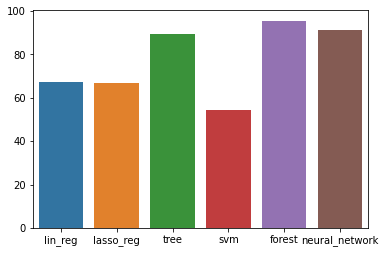

In [ ]:
#selecting the best model

from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)